#Intrucciones Archivo

Para poder ejecutar los modelos  presentados en este trabajo, es necesario tener **instaladas las siguientes herramientas:**

* **Pyomo:** Permite construir y resolver modelos de optimización
* **GLPK:** Encontrar la solución óptima de los modelos construidos con Pyomo.

### Instalación
Para descagar estos, en la terminal

```bash
pip install pyomo
pip install glpk
```
### Importaciones
Asímismo será necesario realizar la siguiente importaciones:

```python
#pyomo
from pyomo.environ import *

#grafos
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
from pyomo.environ import *
import networkx as nx
import matplotlib.pyplot as plt

## Organización Fichero

**Índice del Fichero**

1. **Introducción**: Se presenta una descripción general de los problemas planteados.

2. **Optimización de Beneficios de Plantas Renovables**:
   - En este apartado se plantea un problema de optimización para maximizar los beneficios generados por plantas solares y eólicas. Se desarrolla su formulación matemática en un modelo primal y se obtiene su solución óptima.
   - Se incluye el análisis del primal utilizando el Teorema de la Holgura Complementaria, interpretando las restricciones activas y los precios sombra asociados.
   - Además, se realiza un análisis de sensibilidad para estudiar cómo cambian los resultados al modificar los coeficientes de la función objetivo.

3. **Dual**:
   - Se formula y resuelve el modelo dual del problema planteado. Este modelo permite interpretar los valores de los precios sombra.

4. **Comercialización y Distribución de la Energía**:
   - En este apartado se plantea una variante del problema del modelo de transporte, enfocada en la distribución de energía renovable desde plantas de generación hacia tres empresas españolas.
.

##Introducción

En este documento, se abordan dos problemas clásicos de optimización en el ámbito de la programación lineal:

1.	**Maximización de Beneficios**: Este enfoque busca determinar la combinación óptima de variables que maximicen el beneficio total de una empresa, considerando las limitaciones de recursos disponibles.

2.	**Problema del Transporte**: Este problema se centra en minimizar los costes asociados con la distribución de productos desde múltiples orígenes hasta diversos destinos, satisfaciendo las demandas y ofertas establecidas. La formulación lineal del problema de transporte clásico fue descrita por Frank Lauren Hitchcock en 1941 en su artículo “The Distribution of a Product from Several Sources to Numerous Localities”. De manera independiente, Tjalling Charles Koopmans también desarrolló avances en los problemas del transporte durante los años 1941 y 1942.


## Optmización de Beneficios Plantas Renovables

En el transcurso de los últimos años, España ha apostado cada vez más por las energías renovables. Por esta razón, empresas referentes en este campo, como Iberdrola, han decidido comprometerse con este cambio y construir nuevos parques eólicos y solares en toda la península.

Para llevar a cabo este ambicioso proyecto, Iberdrola ha decidido construir **seis parques de energía renovable**: tres solares y tres eólicos. No obstante, este plan debe llevarse a cabo dentro de un contexto de recursos limitados, que se explicarán a continuación, con la finalidad de maximizar las ventajas que estos parques puedan producir.

## Datos Problema

Para alcanzar este objetivo, Iberdrola debe determinar cuánta **potencia (en MW) instalar en cada parque** para **maximizar los beneficios totales**. Sin embargo, este proyecto debe ajustarse a una serie de restricciones clave que limitan los recursos disponibles:


1. **Presupuesto para materiales**: Iberdrola dispone de un presupuesto de 860 millones de euros para la compra de materiales necesarios para la construcción de los parques.  
2. **Horas-hombre disponibles**: Se han contratado un equipo de ingenieros  con una disponibilidad máxima de 177,000 horas para construir los parques.
3. **Superficie total disponible**: Se cuenta con un total de 1,820 hectáreas de terreno .
4. **Presupuesto para impuestos municipales**: Iberdrola ha destinado un total de 15,000 miles de euros para cubrir los impuestos municipales de las ciudades donde se instalarán estos parques.

Para decidir qué potencia en cada parque, es importante considerar sus características únicas en cuanto a costes, recursos necesarios y beneficios que generan. A continuación, se describen las carácterísticas de cada uno de ellos:

Beneficio (M€/MW) | Coste Material (M€/MW) | Horas-Hombre (horas/MW) | Superficie (Ha/MW) | Impuestos (miles €/MW)
------------------ | --------------------- | ----------------------- | ------------------- | ---------------------
4.8               | 5                     | 1200                   | 9.7                 | 45
4.5               | 3                     | 1050                   | 10.5                | 70
4.6               | 7                     | 1130                   | 8.2                 | 100
4.3               | 4                     | 950                    | 10.7                | 45
4.7               | 6                     | 1025                   | 11                  | 60
4.9               | 5                     | 1150                   | 11.3                | 75



## Formulación Matemática

Para incorporar todas las restricciones y objetivos mencionados, se plantea el siguiente problema de programación lineal.

 **Variables de Decisión**

-$ x_1 $: Potencia instalada en el parque solar 1

-$x_2 $: Potencia instalada en el parque solar 2

-$x_3 $: Potencia instalada en el parque solar 3

-$x_4 $: Potencia instalada en el parque eólico 1.

-$ x_5$: Potencia instalada en el parque eólico 2.

-$x_6$: Potencia instaladaen el parque eólico 3.

 **Función Objetivo**

El objetivo es **maximizar el beneficio tota(€)** generado por los parques:

$$
\text{Maximizar: } Z = 4.8x_1 + 4.5x_2 + 4.6x_3 + 4.3x_4 + 4.7x_5 + 4.9x_6
$$

 **Restricciones**
1. **Presupuesto para materiales:**
   
   $$
   5x_1 + 3x_2 + 7x_3 + 4x_4 + 6x_5 + 5x_6 \leq 860
   $$

2. **Horas-hombre disponibles:**
   $$
   1200x_1 + 1050x_2 + 1130x_3 + 950x_4 + 1025x_5 + 1150x_6 \leq 177000
   $$

3. **Disponibilidad de hectáreas:**
   $$
   9.7x_1 + 10.5x_2 + 8.2x_3 + 10.7x_4 + 11x_5 + 11.3x_6 \leq 1820
   $$

4. **Presupuesto para impuestos:**
   $$
   45x_1 + 70x_2 + 100x_3 + 45x_4 + 60x_5 + 75x_6 \leq 15000
   $$

5. **No negatividad:**
  $$
   x_1, x_2, x_3, x_4, x_5, x_6 \geq 0
   $$



In [ ]:

modelo1 = ConcreteModel()

#Variables decisión
modelo1.x1 = Var(within=NonNegativeReals)  # Parque Solar 1
modelo1.x2 = Var(within=NonNegativeReals)  # Parque Solar 2
modelo1.x3 = Var(within=NonNegativeReals)  # Parque Solar 3
modelo1.x4 = Var(within=NonNegativeReals)  # Parque Eólico 1
modelo1.x5 = Var(within=NonNegativeReals)  # Parque Eólico 2
modelo1.x6 = Var(within=NonNegativeReals)  # Parque Eólico 3

#Función objetivo
modelo1.objetivo = Objective(expr=4.8 * modelo1.x1 + 4.5 * modelo1.x2 + 4.6 * modelo1.x3 + 4.3 * modelo1.x4 + 4.7 * modelo1.x5 + 4.9 * modelo1.x6,sense=maximize)


#1.Materiales
modelo1.materiales = Constraint(expr=5 * modelo1.x1 + 3 * modelo1.x2 + 7 * modelo1.x3 +4 * modelo1.x4 + 6 * modelo1.x5 + 5 * modelo1.x6 <= 750)

#2.Horas-hombre
modelo1.horas_hombre = Constraint(expr=1200 * modelo1.x1 + 1050 * modelo1.x2 + 1130 * modelo1.x3 + 950 * modelo1.x4 + 1025 * modelo1.x5 + 1150 * modelo1.x6 <= 150000)

#3.Hectareas
modelo1.terreno = Constraint(
    expr=9.7 * modelo1.x1 + 10.5 * modelo1.x2 + 8.2 * modelo1.x3 +
         10.7 * modelo1.x4 + 11 * modelo1.x5 + 11.3 * modelo1.x6 <= 1350
)

#4.Impuestos
modelo1.impuestos = Constraint(expr=45 * modelo1.x1 + 70 * modelo1.x2 + 100 * modelo1.x3 + 45 * modelo1.x4 + 60 * modelo1.x5 + 75 * modelo1.x6 <= 10000)


solver = SolverFactory('glpk')
resultados = solver.solve(modelo1)

beneficio_total = modelo1.objetivo() #Millones €

# potencia parque
capacidades_solares = {
    "Parque Solar 1": modelo1.x1(),
    "Parque Solar 2": modelo1.x2(),
    "Parque Solar 3": modelo1.x3(),
}

capacidades_eolicas = {
    "Parque Eólico 1": modelo1.x4(),
    "Parque Eólico 2": modelo1.x5(),
    "Parque Eólico 3": modelo1.x6()
}

print(f"Beneficio total: {beneficio_total:.2f} millones de euros")
print("\nPotencias instaladas en parques solares (MW):")
for parque, capacidad in capacidades_solares.items():
    print(f"  {parque}: {capacidad:.3f} MW")

print("\nPotencias instaladas en parques eólicos (MW):")
for parque, capacidad in capacidades_eolicas.items():
    print(f"  {parque}: {capacidad:.3f} MW")


## Resultados Primal

Para maximizar el beneficio obtenido por Iberdrola, las potencias que se deberían instalar en los parques son:
## Potencias Instaladas

Parques Solares
- Parque Solar 1: 20.564 MW
- Parque Solar 2: 32.746 MW
- Parque Solar 3: 43.100 MW


Parques Eólicos
- Parque Eólico 1: 0.000 MW
- Parque Eólico 2: 41.208 MW
- Parque Eólico 3: 0.000 MW

## Beneficio Total
- 637.996 millones de euros



## Análisis del Primal-Teorema de la Holgura Complementaria

Antes de plantear el problema dual, hemos estudiado las restricciones del modelo primal. Al sustituir las potencias instaladas obtenidas en las restricciones del modelo , observamos que todas las restricciones se verifican prácticamente con igualdad $(Ax - b \approx 0)$, lo que significa que todos los  recursos se están consumiendo completamente o casi completamente, considerando el redondeo numérico.

De acuerdo con el **teorema de la holgura complementaria**, cuando una restricción está activa $(Ax - b = 0)$, el precio sombra asociado a dicha restricción en el modelo dual será distinto de cero. Esto implica que cualquier aumento en la disponibilidad de los  recursos asociados a esas restricciones tendrá un impacto positivo en nuestra función objetivo, es decir, aumentará el beneficio total.

En nuestro caso, como los recursos **Materiales, horas-hombre, superficie e impuestos** se están consumiendo completamente, disponer de una unidad más de cualquiera de estos recursos tendrá un impacto positivo en la función objetivo. Este impacto será estudiado a través de los **precios sombra** que se calcularán al plantear y resolver el problema dual.



## Análisis de sensibilidad coeficientes de la f.objetivo

Ahora, Iberdrola desea realizar un análisis de sensibilidad para ver  cómo variaría el beneficio total si se modificasen los beneficios por megavatio generado en algunas de sus plantas.

Para este análisis, se centrará en ajustar los beneficios asociados a dos plantas específicas:

-Planta 1 $x_1$: Representa el beneficio generado por cada megavatio en el Parque Solar 1.

-Planta 4 $x_4$: Beneficio por megavatio en el Parque Eólico 1.



**Análisis de Sensibilidad del coeficiente x1**

In [ ]:
# modelo
model = ConcreteModel()


model.x1 = Var(within=NonNegativeReals)
model.x2 = Var(within=NonNegativeReals)
model.x3 = Var(within=NonNegativeReals)
model.x4 = Var(within=NonNegativeReals)
model.x5 = Var(within=NonNegativeReals)
model.x6 = Var(within=NonNegativeReals)

#f.objetivo
model.obj = Objective(
    expr=4.8 * model.x1 + 4.5 * model.x2 + 4.6 * model.x3 + 4.3 * model.x4 + 4.7 * model.x5 + 4.9 * model.x6,sense=maximize
)

#restricciones
model.materiales = Constraint(expr=5 * model.x1 + 3 * model.x2 + 7 * model.x3 +4 * model.x4 + 6 * model.x5 + 5 * model.x6 <= 750)
model.horas_hombre = Constraint(expr=1200 * model.x1 + 1050 * model.x2 + 1130 * model.x3 +950 * model.x4 + 1025 * model.x5 + 1150 * model.x6 <= 150000)
model.superficie = Constraint(expr=9.7 * model.x1 + 10.5 * model.x2 + 8.2 * model.x3 +10.7 * model.x4 + 11 * model.x5 + 11.3 * model.x6 <= 1350)
model.impuestos = Constraint(expr=45 * model.x1 + 70 * model.x2 + 100 * model.x3 +45 * model.x4 + 60 * model.x5 + 75 * model.x6 <= 10000)


solver = SolverFactory('glpk')
solver.solve(model)


#Análisis de sensibilidad sobre el beneficio de x1 en la función objetivo
coef_range = [4.7 + i * 0.01 for i in range(18)]  #Cambiar el coeficiente de 4.0 a 5.5 de 0.1 a 0.1
sens_results = []

for coef_x1 in coef_range:
    #cambiar coeficiente x1
    model.obj.set_value(coef_x1 * model.x1 + 4.5 * model.x2 + 4.6 * model.x3 + 4.3 * model.x4 + 4.7 * model.x5 + 4.9 * model.x6 )

    #modelo con coeficiente x1
    solver.solve(model)


    sens_results.append({
        'coef_x1': round(coef_x1, 3),
        'obj_value': round(model.obj(), 3),
    })

#resultados
print("\nAnálisis de sensibilidad en el coeficiente de x1 en la función objetivo:")
for result in sens_results:
    print(f"Coeficiente de x1: {result['coef_x1']}, Valor objetivo: {result['obj_value']}")

**Análisis de Sensibilidad del coeficiente x4**

In [ ]:
#Análisis de sensibilidad sobre el beneficio de x4 en la función objetivo
coef_range_x4 = [4.2 + i * 0.01 for i in range(18)]  # Cambiar el coeficiente entre 4.0 a 5.5 de 0.1 en 0.1
sens_results_x4 = []

for coef_x4 in coef_range_x4:
    #cambiar el coeficiente x2
    model.obj.set_value(
        4.8 * model.x1 + 4.5 * model.x2 + 4.6 * model.x3 +
        coef_x4 * model.x4 + 4.7 * model.x5 + 4.9 * model.x6
    )

    #modelo cambaiando x2
    solver.solve(model)

    sens_results_x4.append({
        'coef_x4': round(coef_x4, 3),
        'obj_value': round(model.obj(), 3),
    })

# Resultados
print("\nAnálisis de sensibilidad en el coeficiente de x4 en la función objetivo:")
for result in sens_results_x4:
    print(f"Coeficiente de x4: {result['coef_x4']}, Valor objetivo: {result['obj_value']}")


**Análisis de sensibilidad de \(x_1\) y \(x_4\)**

*Coeficiente $x_1$(Millones de euros por MW en el Parque Solar 1):*
- El beneficio total aumenta linealmente con $x_1$, creciendo aproximadamente **0.206 millones de euros** por cada incremento de $0.01$ en este coeficiente.


*Coeficiente $x_4$ (Millones de euros por MW en el Parque Eólico 1):*
- Para $x_4 \leq 4.32$ el beneficio total permanece constante $Z = 637.996$ millones de euros.
- A partir de $x_4 > 4.32$, el beneficio total comienza a aumentar significativamente,  incremento notable de **0.271 millones de euros** al pasar de \(4.32\) a \(4.33\).

## Dual

Una vez calculadas las potencias que Iberdrola debería instalar en cada parque.La empresa se plantea ahora cómo podría maximizar aún más el beneficio obtenido.

Así pues, la compañía se da cuenta de que al aumentar la disponibilidad de ciertos recursos clave, como horas-hombre, hectáreas o presupuestos, el beneficio también se incrementa.

Para estudiar cómo este incremento en los recursos disponibles afecta a los beneficios generados por los parques, se plantea el modelo dual, que permite evaluar el impacto de añadir unidades adicionales de cada recurso.

### Formulación matemática


 **Variables Duales**

- $ y_1 $: Precio sombra asociado al coste de prespuesto para materiales.
- $ y_2 $: Precio sombra asociado a las  horas-hombre.
- $y_3 $: Precio sombra asociado al número de hectáreas disponibles.
- $ y_4 $: Precio sombra asociado al presupuesto para impuestos.

 **Función Objetivo**

$$
\text{Minimizar: } Z = 750y_1 + 150000y_2 + 1350y_3 + 10000y_4
$$


 **Restricciones**


1. Para el **Parque Solar 1**:

   $$
   5y_1 + 1200y_2 + 9.7y_3 + 45y_4 \geq 4.8
   $$

2. Para el **Parque Solar 2**:
   $$
   3y_1 + 1050y_2 + 10.5y_3 + 70y_4 \geq 4.5
   $$

3. Para el **Parque Solar 3**:
   $$
   7y_1 + 1130y_2 + 8.2y_3 + 100y_4 \geq 4.6
   $$

4. Para el **Parque Eólico 1**:
   $$
   4y_1 + 950y_2 + 10.7y_3 + 45y_4 \geq 4.3
   $$

5. Para el **Parque Eólico 2**:
   $$
   6y_1 + 1025y_2 + 11y_3 + 60y_4 \geq 4.7
   $$

6. Para el **Parque Eólico 3**:
   $$
   5y_1 + 1150y_2 + 11.3y_3 + 75y_4 \geq 4.9
   $$

In [ ]:

dual_model = ConcreteModel()


dual_model.y1 = Var(within=NonNegativeReals)
dual_model.y2 = Var(within=NonNegativeReals)
dual_model.y3 = Var(within=NonNegativeReals)
dual_model.y4 = Var(within=NonNegativeReals)

#F.objetivo
dual_model.objective = Objective(expr=750 * dual_model.y1 + 150000 * dual_model.y2 + 1350 * dual_model.y3 + 10000 * dual_model.y4,sense=minimize)

# Restricciones
dual_model.c1 = Constraint(expr=5 * dual_model.y1 + 1200 * dual_model.y2 + 9.7 * dual_model.y3 + 45 * dual_model.y4 >= 4.8)
dual_model.c2 = Constraint(expr=3 * dual_model.y1 + 1050 * dual_model.y2 + 10.5 * dual_model.y3 + 70 * dual_model.y4 >= 4.5)
dual_model.c3 = Constraint(expr=7 * dual_model.y1 + 1130 * dual_model.y2 + 8.2 * dual_model.y3 + 100 * dual_model.y4 >= 4.6)
dual_model.c4 = Constraint(expr=4 * dual_model.y1 + 950 * dual_model.y2 + 10.7 * dual_model.y3 + 45 * dual_model.y4 >= 4.3)
dual_model.c5 = Constraint(expr=6 * dual_model.y1 + 1025 * dual_model.y2 + 11 * dual_model.y3 + 60 * dual_model.y4 >= 4.7)
dual_model.c6 = Constraint(expr=5 * dual_model.y1 + 1150 * dual_model.y2 + 11.3 * dual_model.y3 + 75 * dual_model.y4 >= 4.9)


solver = SolverFactory('glpk')
dual_results = solver.solve(dual_model)



total_cost = dual_model.objective()

# Print dual variables (shadow prices)
dual_values = {
    "Materiales (y1)": dual_model.y1(),
    "Horas-hombre (y2)": dual_model.y2(),
    "Hectáreas (y3)": dual_model.y3(),
    "Impuestos (y4)": dual_model.y4()
}


print(f"Costo total de recursos: {total_cost:.3f} millones de euros")
print("\nPrecios sombra de los recursos:")
for resource, value in dual_values.items():
    print(f"  {resource}: {value:.3f}")

### Análisis Precios Sombra

 **Precios sombra**

1. **Presupuesto para materiales (Precio sombra = 0.063)**  
   Incrementar el presupuesto para materiales en 1 millón de euros aumentaría el beneficio total en **0.063 millones de euros (63,000 euros)**. Este recurso es limitante y valioso para optimizar los beneficios.

2. **Horas-hombre disponibles (Precio sombra = 0.002)**  
   Incrementar las horas-hombre disponibles en 1,000 horas generaría un aumento en el beneficio de **0.002 millones de euros (2,000 euros)**. Aunque positivo, su impacto es menor en comparación con otros recursos.

3. **Disponibilidad de hectáreas (Precio sombra = 0.168)**  
   Incrementar el terreno disponible en 1 ha aumentaría el beneficio en **0.168 millones de euros (168,000 euros)**. Es el recurso con mayor impacto en los beneficios.

4. **Presupuesto para impuestos (Precio sombra = 0.002)**  
   Incrementar el presupuesto para impuestos en 1,000 euros aumentaría el beneficio total en **0.002 millones de euros (2,000 euros)**.

## Comercialización y Distribucción de la Energía

Después de haber optimizado los beneficios de la producción en sus parques eólicos y solares, Iberdrola da un paso más y decide colaborar con una comercializadora para garantizar que la distrubucción de la energia generada  a tres grandes empresas españolas: **Mercadona**, **Amazon** y **Telefónica**.

Comprometidas con la sostenibilidad, estas compañías han exigido que el 100% de la energía que consumen provenga de fuentes renovables. Para cumplir con este objetivo, la comercializadora ha firmado un contrato con Iberdrola, confiando en dos de sus principales fuentes de generación sostenible: un **Parque Eólico** y una **Planta Solar**.


Sin embargo, gestionar la  distrubucción de la energía renovable no resulta una tarea fácil. Las condiciones climatológicas son impredecibles, y la comercializadora debe asegurarse de que la demanda de los clientes se cubra en todo momento.

Para ello, la comercializadora ha diseñado un modelo basado en tres pilares fundamentales:

1. **Exceso de capacidad**: Asegurar que la producción siempre sea mayor a la demanda esperada, evitando faltantes.
2. **Almacenamiento**: Conservar los excedentes de producción para cubrir períodos de menor generación.
3. **Venta estratégica**: Maximizar los beneficios al vender los excedentes de energía a otros clientes.


El objetivo principal de la comercializadora es **minimizar los costes asociados al transporte, almacenamiento y suministro**, asegurando al mismo tiempo que las demandas de las empresas se cumplan al 100%.


## Datos Problema

Para abordar este problema de distribución energética, se han recopilado los siguientes datos recogidos en las tablas mostradas a continuación.

La siguiente tabla muestra la energía contratada por la comercializadora a Iberdrola y el consumo de cada empresa por cuatrimeste (**MWh**):

| **Período** | **Producción (Parque Eólico)** | **Producción (Planta Solar)** | **Demanda Mercadona** | **Demanda Amazon** | **Demanda Telefónica** |
|-------------|--------------------------------|-------------------------------|------------------------|--------------------|-------------------------|
| 1           | 15                             | 25                            | 10                     | 5                  | 20                      |
| 2           | 15                             | 25                            | 10                     | 10                 | 10                      |
| 3           | 10                             | 20                            | 10                     | 15                 | 10                      |


*¿Qué sucede en el tercer cuatrimestre ?*

En el último cuatrimestre del año, debido a las condiciones climáticas, **la oferta de energía es inferior a la demanda**. En este período, el **Parque Eólico** genera 10 MWh y la **Planta Solar** produce 20 MWh, lo que suma un total de 30 MWh. Sin embargo, la demanda total de las empresas asciende a **35 MWh**, dejando un déficit de 5 MWh que no podría cubrirse solo con la producción actual.

Gracias a la estrategia de almacenamiento ideada por la empresa .Durante el segundo cuatrimestre, donde las condiciones climáticas favorecieron una **oferta superior a la demanda**, la empresa tomó la decisión estratégica de almacenar **5 MWh de excedente** permitiendo ahora satisfacer la demanda en el tercer cuatrimestre

**Costes de distribución**

El precio de distribuicción de energía desde las dos plantas a las empresas que debe abonar la comercializadora a Iberdrola esta contemplado en la siguiente tabla  (**€/MWh**):

| **Origen / Empresa** | **Mercadona** | **Amazon** | **Telefónica** |
|-----------------------|---------------|------------|----------------|
| **Desde Parque Eólico** | 7             | 9          | 12             |
| **Desde Planta Solar**  | 10            | 11         | 16             |

**Costes Almacenamiento y Venta**

Por otro lado los costes fijos de almacenamiento y venta en la dos plantas son los siguientes:
- **Almacenamiento**:
  - **Parque Eólico**: 3 €/MWh por cuatrimestre.
  - **Planta Solar**: 2 €/MWh por cuatrimestre.
  - La energía almacenada **no genera costos adicionales al ser suministrada**.

- **Venta directa a clientes externos**:
  - **Parque Eólico**: Genera un beneficio de 5 €/MWh.
  - **Planta Solar**: Genera un beneficio de 8 €/MWh.


## Representación gráfica del problema

En este apartado, hemos representado con un grafo las conexiones entre el **Parque Eólico** y  la **Planta Solar** y las tres empresas a las que se distribuye la energía (**Mercadona**, **Amazon**, y **Telefónica**).

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

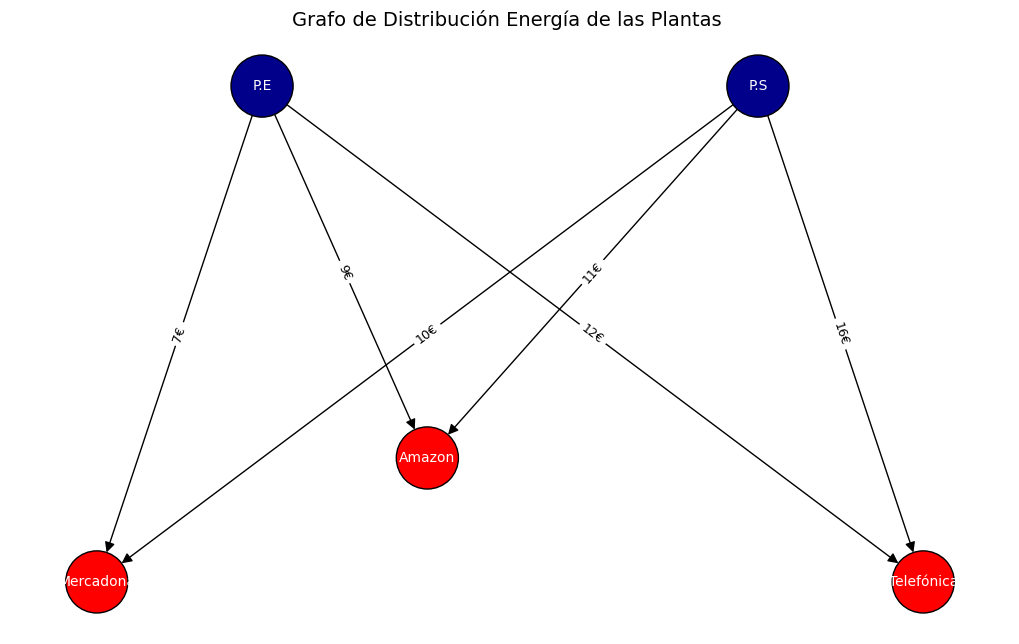

In [ ]:

G = nx.DiGraph()

nodos = {
    "P.E": (0, 6),
    "P.S": (6, 6),
    "Mercadona": (-2, 2),
    "Amazon": (2, 3),
    "Telefónica": (8, 2),
}

G.add_nodes_from(nodos.keys())

# Aristas
G.add_edge("P.E", "Mercadona", weight=7)  #P.E -> Mercadona
G.add_edge("P.E", "Amazon", weight=9)    #P.E ->Amazon
G.add_edge("P.E", "Telefónica", weight=12)  #P.E -> Telefónica
G.add_edge("P.S", "Mercadona", weight=10)  #P.S -> Mercadona
G.add_edge("P.S", "Amazon", weight=11)    #P.S -> Amazon
G.add_edge("P.S", "Telefónica", weight=16)  #P.S ->Telefónica


plt.figure(figsize=(10, 6))


node_colors = [
    "darkblue" if nodo in ["P.E", "P.S"] else "red"for nodo in nodos.keys()
]


nx.draw(G,pos=nodos,with_labels=True,node_size=2000,node_color=node_colors,font_size=10,edgecolors="black",font_color="white",arrowsize=15,)

# coste en las aristas
edge_labels = {(u, v): f"{d['weight']}€" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos=nodos, edge_labels=edge_labels, font_size=9)

#
plt.title("Grafo de Distribución Energía de las Plantas ", fontsize=14)
plt.show()

## Formulación Matemática

**Definición de las variables**

- $ X_{ijt} $: Cantidad de energía suministrada desde la planta $ i $ a la empresa $ j $ en el período $ t $.
  - **Ejemplo**: $ X_{121} $ es la cantidad de energía suministrada por la planta 1 (Parque eólico) a la empresa 2 (Amazón) en el primer cuatrimestre.
    
- $ V_{it} $: Cantidad de energía vendida directamente desde la planta $ i $ en el período $ t $.
  - **Ejemplo**: $ V_{12} $ es la cantidad de energía vendida por la planta 1 (Parque Eólico) en el segundo cuatrimestre.

- $ A_{it} $: Cantidad de energía almacenada en la planta $ i $ en el período $ t $.
  - **Ejemplo**: $ A_{22} $ es la cantidad de energía almacenada en la planta 2 (Planta Solar) en el segundo cuatrimestre.



*Subíndices*:
- Cada subíndice tiene el siguiente significado:
  - $ i $: Indica la planta de origen (1 = Parque Eólico, 2 = Planta Solar).
  - $ j $: Indica la empresa (1 = Mercadona, 2 = Amazon, 3 = Telefónica).
  - $ t $: Indica el período o cuatrimestre (1, 2, o 3).

**Restricciones del Modelo**

*Período 1*

1. **Oferta total de las plantas:**
   - **Planta 1 (Parque Eólico):**
     $$
     X_{111} + X_{121} + X_{131} + V_{11} = 15
     $$
   - **Planta 2 (Planta Solar):**
     $$
     X_{211} + X_{221} + X_{231} + V_{21} = 25
     $$

2. **Límite de ventas directas:**
   - La suma de la energía vendida desde ambas plantas debe ser igual a 5 MWh (en este periodo no es preciso almacenar para ocasiones futuras,entonces el excendete se vende):
    $$
     V_{11} + V_{21} = 5
    $$

3. **Cobertura de demanda de las empresas:**
   - **Mercadona (Empresa 1):**
     $$
     X_{111} + X_{211} = 10
     $$
   - **Amazon (Empresa 2):**
     $$
     X_{121} + X_{221} = 5
     $$
   - **Telefónica (Empresa 3):**
     $$
     X_{131} + X_{231} = 20
     $$



 *Período 2*

1. **Oferta total de las plantas:**
   - **Planta 1 (Parque Eólico):**
     $$
     X_{112} + X_{122} + X_{132} + V_{12} + A_{12} = 15
     $$
   - **Planta 2 (Planta Solar):**
     $$
     X_{212} + X_{222} + X_{232} + V_{22} + A_{22} = 25
     $$

2. **Límite de ventas directas:**
   - La suma de la energía vendida desde ambas plantas no debe superar los 5 MWh:
     $$
     V_{12} + V_{22} = 5
     $$

3. **Almacenamiento:**
   - La suma de la energía almacenada en ambas plantas debe ser exactamente 5 MWh para garantizar el suministro en el siguiente período:
     $$
     A_{12} + A_{22} = 5
     $$

4. **Cobertura de demanda de las empresas:**
   - **Mercadona (Empresa 1):**
     $$
     X_{112} + X_{212} = 10
     $$
   - **Amazon (Empresa 2):**
     $$
     X_{122} + X_{222} = 10
     $$
   - **Telefónica (Empresa 3):**
     $$
     X_{132} + X_{232} = 10
     $$


*Período 3*

1. **Oferta total de las plantas:**
   - **Planta 1 (Parque Eólico):**
     $$
     X_{113} + X_{123} + X_{133} = 10
     $$
   - **Planta 2 (Planta Solar):**
     $$
     X_{213} + X_{223} + X_{233} = 20
     $$

2. **Cobertura de demanda de las empresas:**
   - **Mercadona (Empresa 1):**
     $$
     X_{113} + X_{213} \leq 10
     $$
   - **Amazon (Empresa 2):**
     $$
     X_{123} + X_{223} \leq 15
     $$
   - **Telefónica (Empresa 3):**
     $$
     X_{133} + X_{233} \leq 20
     $$


 **Función Objetivo**


$$
\text{Minimizar: } Z =
\underbrace{\big( 7 X_{111} + 9 X_{121} + 12 X_{131} + 10 X_{211} + 11 X_{221} + 16 X_{231} \big)}_{\text{Período 1: Costos de transporte}}
$$
$$
+ \underbrace{\big( 7 X_{112} + 9 X_{122} + 12 X_{132} + 10 X_{212} + 11 X_{222} + 16 X_{232} + 3 A_{12} + 2 A_{22} \big)}_{\text{Período 2: Costes de transporte y almacenamiento}}
$$
$$
+ \underbrace{\big( 7 X_{113} + 9 X_{123} + 12 X_{133} + 10 X_{213} + 11 X_{223} + 16 X_{233} \big)}_{\text{Período 3: Costes de transporte}}
$$
$$
- \underbrace{\big( 5 V_{11} + 8 V_{21} \big)}_{\text{Período 1: Beneficio por ventas}}
- \underbrace{\big( 5 V_{12} + 8 V_{22} \big)}_{\text{Período 2: Beneficio por ventas}}
$$


*Explicación*
1. Período 1 (Transporte y ventas):
   - Incluye los costes de transportar energía desde ambas plantas hacia las empresas.
   - También incluye los beneficios por la venta directa de energía sobrante.

2. **Período 2 (Transporte, almacenamiento y ventas):**
   - Incluye los costes de transporte y los costos de almacenamiento de energía $A_{12}\ y A_{22}$ para poder satisfacer la demanda en el siguiente periodo.
   - También incluye los beneficios por la venta directa de energía desde ambas plantas.

3. **Período 3 (Solo transporte):**
   - Incluye únicamente los costes de transportar energía desde las plantas hacia las empresas. No hay almacenamiento ni ventas directas en este período.



In [ ]:
modelo2 = ConcreteModel()

modelo2.plantas = RangeSet(1, 2)  # Plantas (1 = Parque Eólico, 2 = Planta Solar)
modelo2.empresas = RangeSet(1, 3)  # Empresas (1 = Mercadona, 2 = Amazon, 3 = Telefónica)
modelo2.periodos = RangeSet(1, 3)  # Períodos (1, 2, 3)


oferta = {
    (1, 1): 15, (1, 2): 15, (1, 3): 10,
    (2, 1): 25, (2, 2): 25, (2, 3): 20
}

#costes de envío
costes_envio = {
    (1, 1): 7, (1, 2): 9, (1, 3): 12,
    (2, 1): 10, (2, 2): 11, (2, 3): 16
}

#costes de almacenamiento fijos
costes_almacenamiento = {1: 3, 2: 2}
# Beneficio por venta directa en cada planta
beneficio_venta = {1: 5, 2: 8}

#variables del modelo
modelo2.X = Var(modelo2.plantas, modelo2.empresas, modelo2.periodos, within=NonNegativeReals)
modelo2.V = Var(modelo2.plantas, modelo2.periodos, within=NonNegativeReals)
modelo2.A = Var(modelo2.plantas, modelo2.periodos, within=NonNegativeReals)

#f.objetivo
def funcion_objetivo(modelo2):
    return (
        7 * modelo2.X[1, 1, 1] + 9 * modelo2.X[1, 2, 1] + 12 * modelo2.X[1, 3, 1] +
        10 * modelo2.X[2, 1, 1] + 11 * modelo2.X[2, 2, 1] + 16 * modelo2.X[2, 3, 1] +
        7 * modelo2.X[1, 1, 2] + 9 * modelo2.X[1, 2, 2] + 12 * modelo2.X[1, 3, 2] +
        10 * modelo2.X[2, 1, 2] + 11 * modelo2.X[2, 2, 2] + 16 * modelo2.X[2, 3, 2] +
        7 * modelo2.X[1, 1, 3] + 9 * modelo2.X[1, 2, 3] + 12 * modelo2.X[1, 3, 3] +
        10 * modelo2.X[2, 1, 3] + 11 * modelo2.X[2, 2, 3] + 16 * modelo2.X[2, 3, 3] +
        3 * modelo2.A[1, 2] + 2 * modelo2.A[2, 2] -5 * modelo2.V[1, 1] - 8 * modelo2.V[2, 1] -5 * modelo2.V[1, 2] - 8 * modelo2.V[2, 2]
    )

modelo2.obj = Objective(rule=funcion_objetivo, sense=minimize)

#restricciones x período

#Período 1
modelo2.oferta1_planta1 = Constraint(expr=modelo2.X[1, 1, 1] + modelo2.X[1, 2, 1] + modelo2.X[1, 3, 1] + modelo2.V[1, 1] == 15)
modelo2.oferta1_planta2 = Constraint(expr=modelo2.X[2, 1, 1] + modelo2.X[2, 2, 1] + modelo2.X[2, 3, 1] + modelo2.V[2, 1] == 25)
modelo2.ventas1 = Constraint(expr=modelo2.V[1, 1] + modelo2.V[2, 1] == 5)


modelo2.demanda1_empresa1 = Constraint(expr=modelo2.X[1, 1, 1] + modelo2.X[2, 1, 1] == 10)
modelo2.demanda1_empresa2 = Constraint(expr=modelo2.X[1, 2, 1] + modelo2.X[2, 2, 1] == 5)
modelo2.demanda1_empresa3 = Constraint(expr=modelo2.X[1, 3, 1] + modelo2.X[2, 3, 1] == 20)

#Período 2
modelo2.oferta2_planta1 = Constraint(expr=modelo2.X[1, 1, 2] + modelo2.X[1, 2, 2] + modelo2.X[1, 3, 2] + modelo2.V[1, 2] + modelo2.A[1, 2] == 15)
modelo2.oferta2_planta2 = Constraint(expr=modelo2.X[2, 1, 2] + modelo2.X[2, 2, 2] + modelo2.X[2, 3, 2] + modelo2.V[2, 2] + modelo2.A[2, 2] == 25)
modelo2.ventas2 = Constraint(expr=modelo2.V[1, 2] + modelo2.V[2, 2] == 5)
modelo2.almacenamiento = Constraint(expr=modelo2.A[1, 2] + modelo2.A[2, 2] == 5)


modelo2.demanda2_empresa1 = Constraint(expr=modelo2.X[1, 1, 2] + modelo2.X[2, 1, 2] == 10)
modelo2.demanda2_empresa2 = Constraint(expr=modelo2.X[1, 2, 2] + modelo2.X[2, 2, 2] == 10)
modelo2.demanda2_empresa3 = Constraint(expr=modelo2.X[1, 3, 2] + modelo2.X[2, 3, 2] == 10)

#Período 3
modelo2.oferta3_planta1 = Constraint(expr=modelo2.X[1, 1, 3] + modelo2.X[1, 2, 3] + modelo2.X[1, 3, 3] == 10)
modelo2.oferta3_planta2 = Constraint(expr=modelo2.X[2, 1, 3] + modelo2.X[2, 2, 3] + modelo2.X[2, 3, 3] == 20)

modelo2.demanda3_empresa1 = Constraint(expr=modelo2.X[1, 1, 3] + modelo2.X[2, 1, 3] <= 10)
modelo2.demanda3_empresa2 = Constraint(expr=modelo2.X[1, 2, 3] + modelo2.X[2, 2, 3] <= 15)
modelo2.demanda3_empresa3 = Constraint(expr=modelo2.X[1, 3, 3] + modelo2.X[2, 3, 3] <= 20)


solver = SolverFactory('glpk')
solver.solve(modelo2)

print("Coste total(€):", modelo2.obj())
for v in modelo2.component_objects(Var, active=True):
    print(f"\n{v.name}")
    for index in v:
        print(f"{index} = {v[index].value}")

## Resultados-PE


**Coste total**
- El coste total mínimo logrado por el modelo es de 970€.

**Distribución de energía por períodos**

1. **Período 1**:
   - El Parque Eólico suministra:
     - 15 MWh a Telefónica
   - La Planta Solar suministra:
     - 10 MWh a Mercadona.
     - 5 MWh a Amazon.
     - 5 MWh a Telefónica.

   Además, la planta solar vende directamente 5 MWh.

2. **Período 2**:
   - El Parque Eólico suministra:
     - 5 MWh a Mercadona.
     - 10 MWh a Telefónica.
   - La Planta Solar (Planta 2)suministra:
     - 5 MWh a Mercadona.
     - 10 MWh a Amazon.

   En este período, la planta solar vende directamente 5 MWh y almacena 5 MWh*para el siguiente período.
3. Período 3:
   - El Parque Eólico suministra:
     - 5 MWh a Mercadona.
     - 5 MWh a Telefónica.
   - La Planta Solar  suministra:
     - 5 MWh a Mercadona.
     - 15 MWh a Amazon, utilizando la energía almacenada en el período anterior.



Los resultados muestran cómo el modelo optimiza la distribución, almacenamiento y venta de energía para minimizar los costes totales. La estrategia de ventas directas y almacenamiento permite manejar eficientemente los excedentes y satisfacer la demanda de las empresas en cada período.

## Referencias

He empleado este libro para tomar ejemplo para plantear los modelos:

Thie, P. R., & Keough, G. E. *An introduction to linear programming and game theory* (3rd ed.). Wiley..
